# **33-Highest OVA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
from mplsoccer import PyPizza, add_image, FontManager


from PIL import Image
import urllib
import json
import os
import math

#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
import datetime

In [8]:
# Import packages
from urllib.request import urlopen, Request
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify the url
url ="https://analytics.soccerment.com/en/league/ligue_1/players/stat/xOVA"

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

soup = BeautifulSoup(r.content, 'lxml')
scripts = soup.find_all('script')


In [9]:
s1= str(soup)
string = s1[12200:]
words = string.split('data-optaid')

In [10]:
words[0]

'>7.34</div>\n<div class="photo">\n<div class="figure">\n<a href="/en/player/19054/lionel-messi-1987-06-24"><img alt="" src="https://soccerment-storage.s3.eu-west-1.amazonaws.com/players/lionel-messi-1987-06-24.png" style="border: solid 4px #000066"/></a>\n<div class="bg_color" style="background-color: #FF0000;"></div>\n</div>\n</div>\n</div>\n<div>\n<table>\n<tr '

In [11]:
name = []
age =[]
xOVA =[]
for x in words[1:450]:
    x = x[100:200]
    a2 = x.split(' |')
    
    pattern = '>'
    res = a2[0].index(pattern)
    a2[0] = a2[0][res+1:]
    
    string = str(a2[2])
    a2[2] = string.split(' ')
    a2[2]=a2[2][2]
    
    string = a2[2]
    pattern = 'c_value">'
    res = string.index(pattern)
    pattern = '</td'
    res2 = string.index(pattern)
    a2[2]= string[res+9:res2]
    
    
    
    
    name.append(a2[0])
    age.append(a2[1][-2:])
    xOVA.append(a2[2])

In [12]:
col_names = ["name",
"age",
"xOVA"]

df = pd.DataFrame([name,age,
xOVA],index =col_names)

df = df.T

df["xOVA"] =df["xOVA"].astype(float)

test = df
test.loc[len(test.index)] = ['L.Messi', 35, 7.34] 
test=test.sort_values(["xOVA"], ascending=[False])
test =test.reset_index(drop=True)

In [13]:
test

,name,age,xOVA
0,L.Messi,35,7.34
1,Neymar,30,6.11
2,K. Mbappé,23,4.78
3,M. Terrier,25,4.52
4,K. Toko Ekambi,30,4.51
...,...,...,...
445,D. Bain,29,0.00
446,Matis Carvalho,23,0.00
447,M. Coco,26,-0.01
448,S. Kumbedi Nseke,17,-0.01


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    450 non-null    object 
 1   age     450 non-null    object 
 2   xOVA    450 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.7+ KB


In [49]:
test["name"]=test["name"].astype(str)
test["age"]=test["age"].astype(float)

In [70]:
liga =test[:10]

In [71]:
 liga = liga.sort_values(["xOVA"], ascending=[True])

In [72]:
liga

,name,age,xOVA
9,F. Honorat,26.0,3.83
8,R. Cabella,32.0,3.93
7,Dango Ouattara,20.0,3.95
6,Junya Ito,29.0,4.45
5,A. Gouiri,22.0,4.49
4,K. Toko Ekambi,30.0,4.51
3,M. Terrier,25.0,4.52
2,K. Mbappé,23.0,4.78
1,Neymar,30.0,6.11
0,L.Messi,35.0,7.34


In [53]:
liga.loc[7,['name']] = 'K. Mbappe'

In [58]:
liga.values[7,0] = 'K. Mbappe'

In [59]:
type(liga)

pandas.core.frame.DataFrame

In [73]:
liga = liga.replace({'K. Mbappé': 'K. Mbappe'})

In [74]:
liga

,name,age,xOVA
9,F. Honorat,26.0,3.83
8,R. Cabella,32.0,3.93
7,Dango Ouattara,20.0,3.95
6,Junya Ito,29.0,4.45
5,A. Gouiri,22.0,4.49
4,K. Toko Ekambi,30.0,4.51
3,M. Terrier,25.0,4.52
2,K. Mbappe,23.0,4.78
1,Neymar,30.0,6.11
0,L.Messi,35.0,7.34


In [111]:
colors = [
    '#efe9e6',
    '#e9e1dd',
    '#e3dad3',
    '#dcd3c9',
    '#d4ccc0',
    '#ccc6b7',
    '#c3bfae',
    '#bab9a6',
    '#b0b39e',
    '#a6ad96',
    '#9ba790',
    '#90a18a',
    '#849b84',
    '#789680',
    '#6c907c',
    '#608a79',
    '#538476',
    '#467e74',
    '#387872',
    '#287271',
]
soc_cm = LinearSegmentedColormap.from_list('SOC', colors, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

In [19]:
#Gradient Color Bar Plots
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import colors as mcolors, path
from matplotlib import patheffects as pe

## **PLOT**

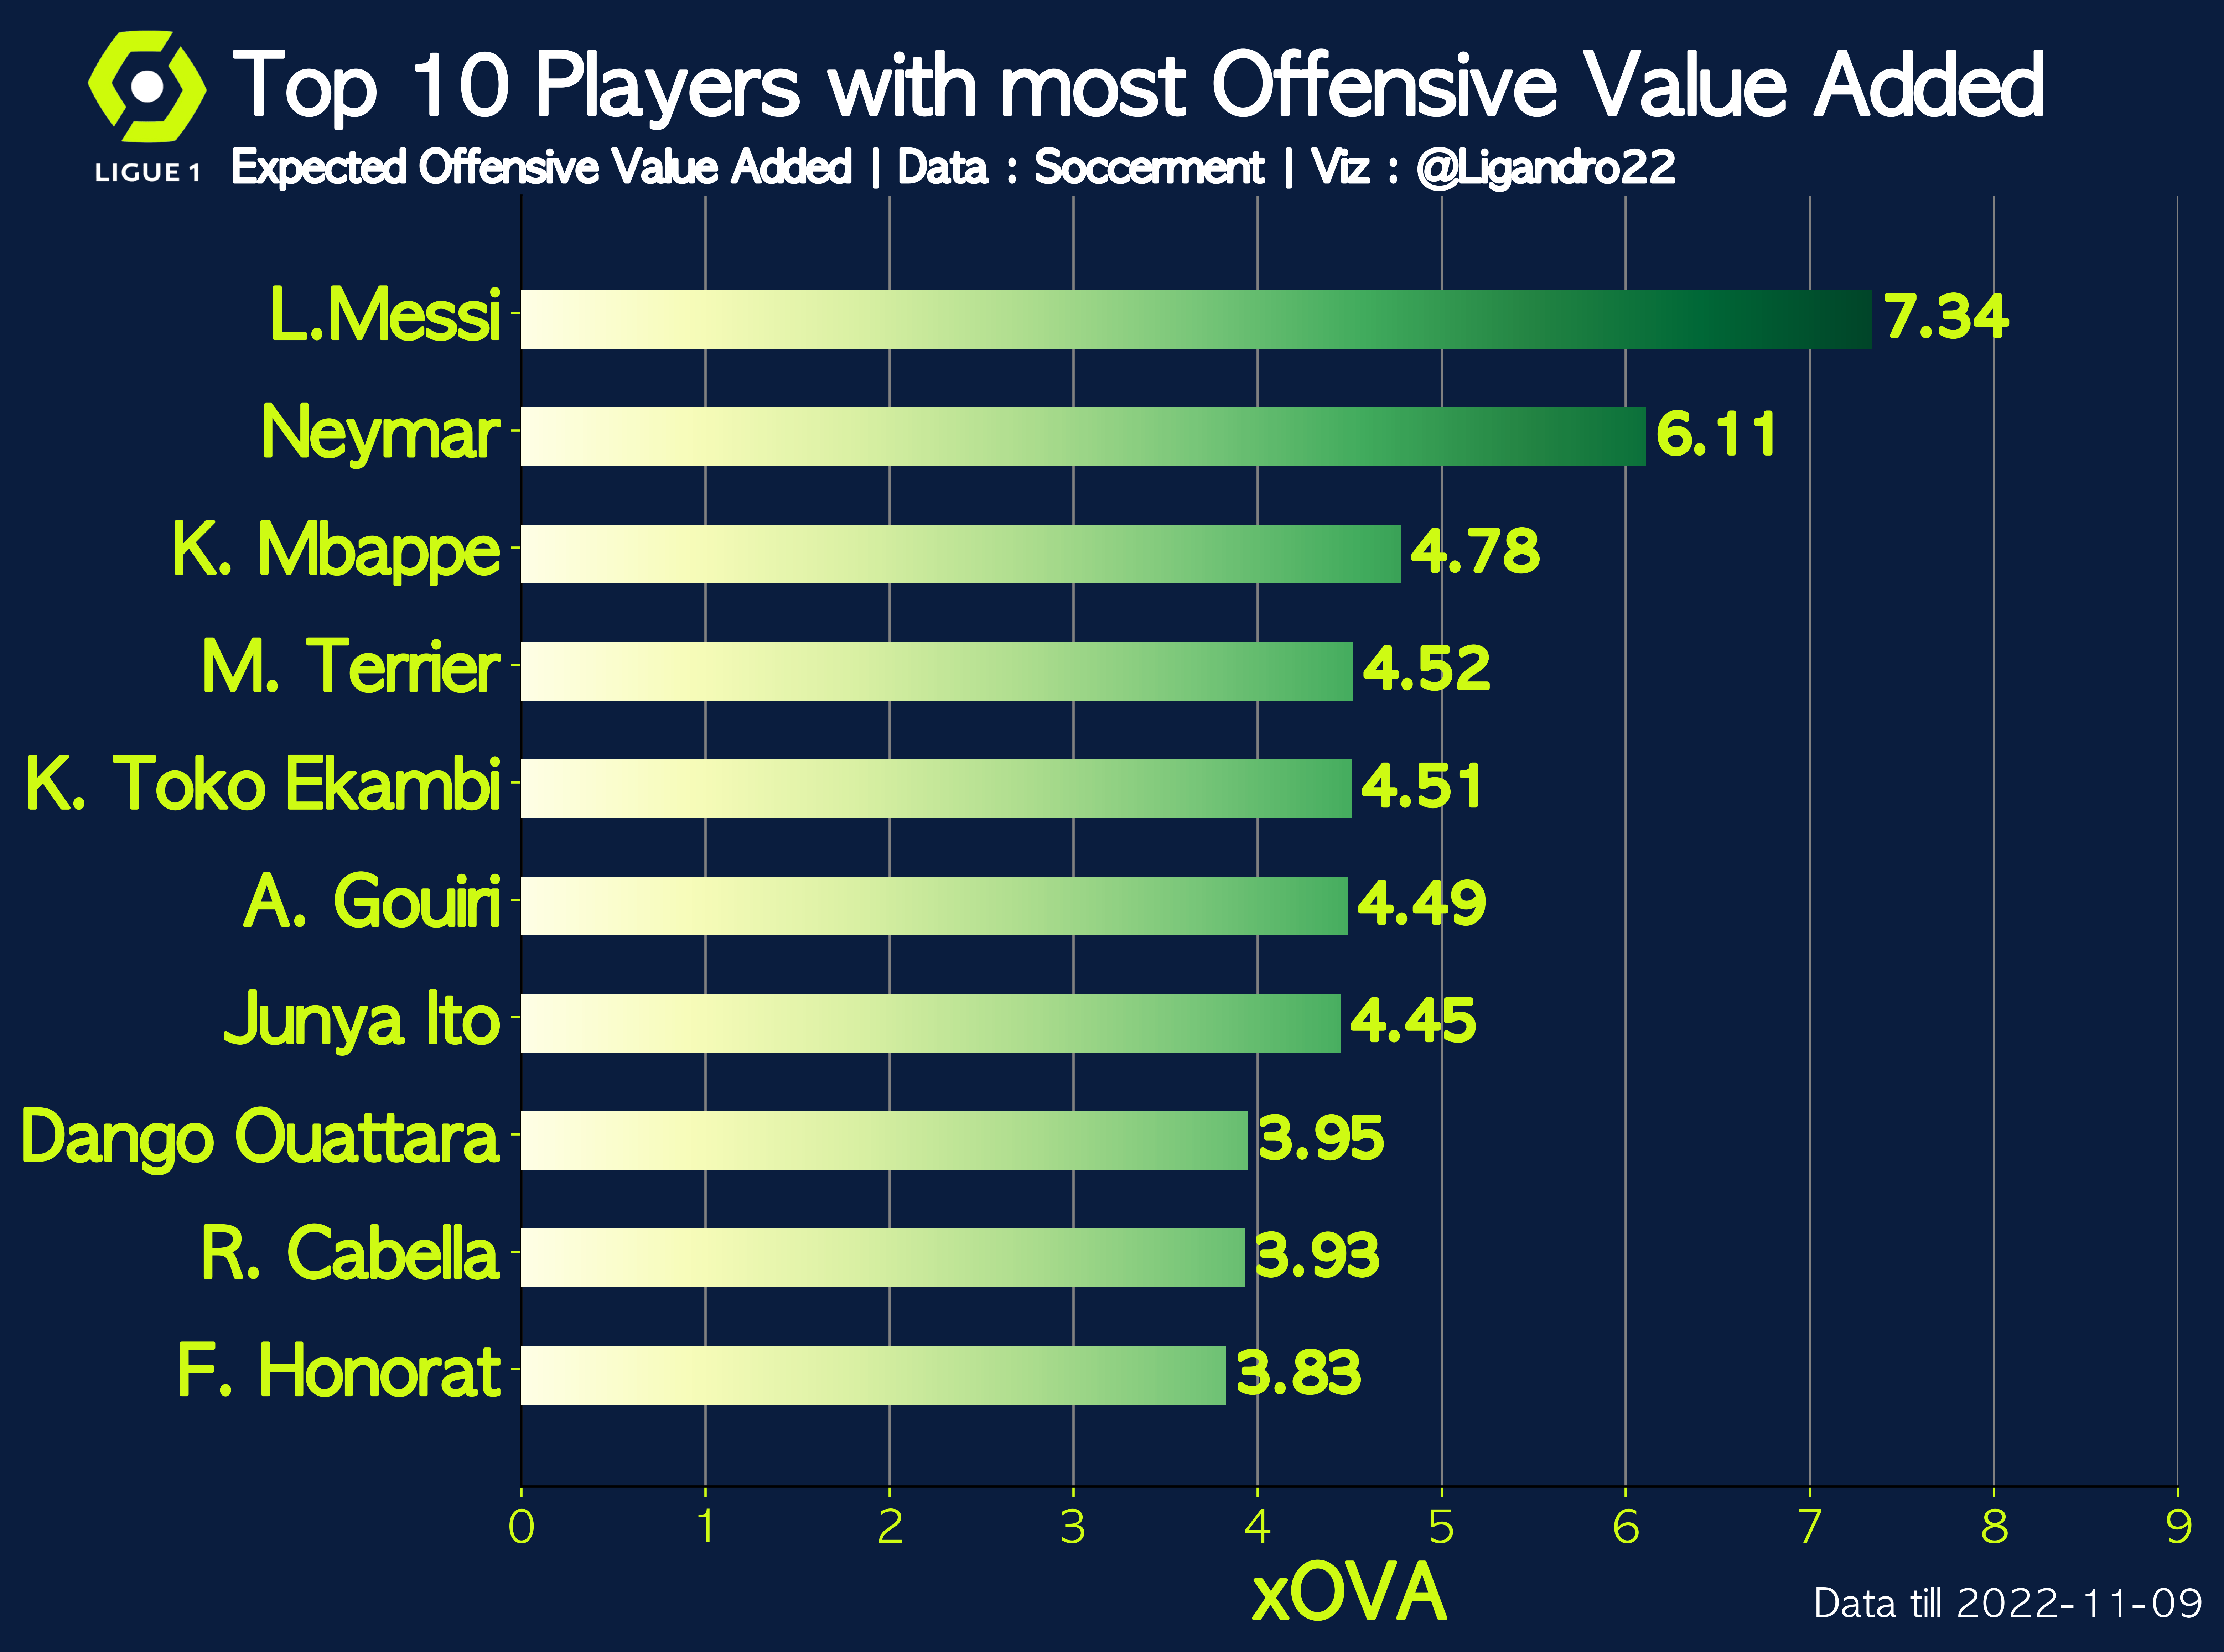

In [81]:
fig = plt.figure(figsize=(10, 8), dpi = 600)
ax = plt.subplot(111)
fig.set_facecolor('#0A1D3E')
ax.patch.set_facecolor('#0A1D3E')
ax.set_ylim(-1, 10)
ax.set_xlim(0,9)

# Add spines
ax.spines["top"].set(visible = False)   #spines removes the plot edges(border)
ax.spines["right"].set(visible = False)

ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='-',zorder=0)


x = datetime.datetime.now()
x = str(x)
date = x[:10]


#plot bars


bars_ = ax.barh(liga["name"],liga["xOVA"],height=0.01)
lim = ax.get_xlim()+ax.get_ylim()
for bar in bars_:
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x,y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    grad = np.atleast_2d(np.linspace(0,1*w/max(liga["xOVA"]),256))
    ax.imshow(
        grad, extent=[x,x+w,y-0.3,y+0.2], 
        aspect='auto', zorder=3, 
        norm=NoNorm(vmin=0,vmax=1), cmap='YlGn'
    ) 
        

ax.tick_params(axis='x', colors='#CEFB13',rotation=90)    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='#CEFB13')


# Adjust ticks
ax.tick_params(axis = "x", rotation = 0)
ax.tick_params(labelsize=15)

plt.yticks(fontname = "AppleGothic", weight = 'bold',size=22,
           path_effects=[path_effects.Stroke(linewidth=1.2, foreground="#CEFB13"), path_effects.Normal()])
plt.xticks(fontname = "AppleGothic", weight = 'bold')

plt.xlabel("xOVA",font ='AppleGothic',weight = 'bold',fontsize = 24,color="#CEFB13",
           path_effects=[path_effects.Stroke(linewidth=1.2, foreground="#CEFB13"), path_effects.Normal()])

aux_counter = 0
index =0
for y_h in (liga["xOVA"]):

    away_text = ax.annotate(
        xy = (y_h+0.4,aux_counter-0.055), # Notice the sum of the bottom data.
        text = f"{y_h}",
        size = 18,
        ha = "center",
        va = "center",
        rotation = 0,fontname = "AppleGothic",weight = "bold",color="#CEFB13"
    )
    
    away_text.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="#CEFB13"), path_effects.Normal()]
    )

    aux_counter += 1
    
fig.text(
    x = -0.01, y = .9192, 
    s = 'Top 10 Players with most Offensive Value Added',
    va = 'bottom', ha = 'left',
    fontsize = 27,  fontname = "AppleGothic", weight = 'bold',color="white",
    path_effects=[path_effects.Stroke(linewidth=1.2, foreground="white"), path_effects.Normal()]
)

fig.text(
    x = -0.01, y = 0.883, 
    s = 'Expected Offensive Value Added | Data : Soccerment | Viz : @Ligandro22',
    va = 'bottom', ha = 'left',
    fontsize = 14, fontname = "AppleGothic",color = 'white',
    path_effects=[path_effects.Stroke(linewidth=1.2, foreground="white"), path_effects.Normal()]
)

fig.text(
    x = 0.73, y = 0.045, 
    s = 'Data till ' + date,
    va = 'bottom', ha = 'left',
    fontsize = 13, fontname = "AppleGothic",color = 'white'
)

# add image
im1 = plt.imread('/Users/ligandrosy/Downloads/Ligue.png')
ax_image = add_image(
          im1, fig, left=-0.1, bottom=0.882, width=0.1, height=0.1
    )   # these values might differ when you are plotting

plt.savefig("AFC VS ARS.jpg",dpi =500, bbox_inches='tight')